In [29]:
import geopandas as gpd
from pathlib import Path
from tqdm import tqdm

# 查看Street文件夹中的所有shp文件
street_dir = Path("Street")
shp_files = list(street_dir.glob("*.shp"))

print("Street文件夹中的shp文件:")
for i, file in enumerate(shp_files):
    print(f"{i+1}. {file.name}")

print("\n" + "="*50)

# 查看每个文件的字段
for file in tqdm(shp_files, desc="检查文件"):
    print(f"\n{file.name} 的字段信息:")
    print("-" * 30)
    
    gdf = gpd.read_file(file)
    print(f"形状: {gdf.shape}")
    print(f"坐标系统: {gdf.crs}")
    
    print("字段列表:")
    for i, col in enumerate(gdf.columns):
        print(f"  {i+1}. {col} ({gdf[col].dtype})")
    
    print("几何类型:")
    print(f"  {gdf.geometry.geom_type.value_counts().to_dict()}")
    
    print("前2行数据:")
    print(gdf.head(2).to_string())

Street文件夹中的shp文件:
1. 南京市_主要道路.shp
2. 南京市_其它道路.shp
3. 南京市_市区一级道路.shp
4. 南京市_行人道路.shp



检查文件:  25%|██▌       | 1/4 [00:00<00:00,  6.61it/s]


南京市_主要道路.shp 的字段信息:
------------------------------
形状: (550, 11)
坐标系统: EPSG:4326
字段列表:
  1. OBJECTID_1 (int64)
  2. OBJECTID (int64)
  3. GB (float64)
  4. RN (object)
  5. NAME (object)
  6. RTEG (object)
  7. TYPE (object)
  8. SHAPE_Leng (float64)
  9. Shape_Le_1 (float64)
  10. Shape_Le_2 (float64)
  11. geometry (geometry)
几何类型:
  {'LineString': 547, 'MultiLineString': 3}
前2行数据:
   OBJECTID_1  OBJECTID        GB    RN   NAME RTEG TYPE  SHAPE_Leng  Shape_Le_1  Shape_Le_2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

检查文件:  25%|██▌       | 1/4 [00:00<00:01,  1.56it/s]


KeyboardInterrupt: 

正在加载和绘制道路数据...
✓ 主要道路: 550 条道路
✓ 市区一级道路: 56677 条道路
✓ 其它道路: 48694 条道路
✓ 行人道路: 5214 条道路


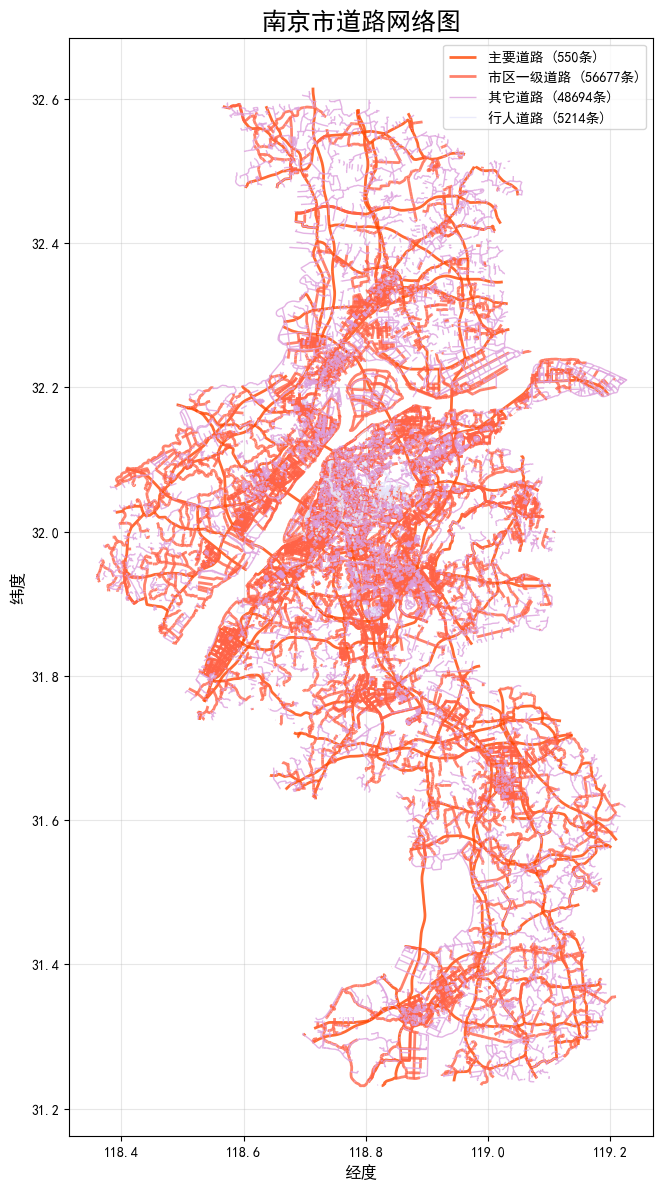

✓ 动态窗口已打开，您可以缩放、平移查看地图
关闭窗口或按 Ctrl+C 结束程序


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义要显示的道路类型
road_types = {
    '主要道路': 'Street/南京市_主要道路.shp',
    '市区一级道路': 'Street/南京市_市区一级道路.shp',
    '其它道路': 'Street/南京市_其它道路.shp',
    '行人道路': 'Street/南京市_行人道路.shp'
}

# 定义颜色
colors = {
    '主要道路': '#FF4500',      # 红橙色
    '市区一级道路': '#FF6347',   # 番茄色
    '其它道路': '#DDA0DD',       # 梅红色
    '行人道路': '#E6E6FA'        # 淡紫色
}

# 创建图形
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

print("正在加载和绘制道路数据...")

# 加载并绘制每种道路
for road_type, file_path in road_types.items():
    try:
        gdf = gpd.read_file(file_path)
        print(f"✓ {road_type}: {len(gdf)} 条道路")
        
        # 根据道路类型设置线宽
        if road_type in ['主要道路', '市区一级道路']:
            linewidth = 2
        else:
            linewidth = 1
            
        gdf.plot(ax=ax, color=colors[road_type], linewidth=linewidth, 
                alpha=0.8, label=f'{road_type} ({len(gdf)}条)')
        
    except Exception as e:
        print(f"✗ {road_type} 加载失败: {e}")

# 设置图形属性
ax.set_title('南京市道路网络图', fontsize=18, fontweight='bold')
ax.set_xlabel('经度', fontsize=12)
ax.set_ylabel('纬度', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()

# 启用交互模式
plt.ion()  # 打开交互模式
plt.show()  # 显示动态窗口

print("✓ 动态窗口已打开，您可以缩放、平移查看地图")
print("关闭窗口或按 Ctrl+C 结束程序")

# 保持窗口打开
try:
    plt.show(block=True)  # 阻塞模式，保持窗口打开
except KeyboardInterrupt:
    print("\n程序已结束")

In [ ]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

# 首先查看字段
print("查看各文件的字段信息:")
print("=" * 50)

road_files = {
    '主要道路': 'Street/南京市_主要道路.shp',
    '市区一级道路': 'Street/南京市_市区一级道路.shp',
    '其它道路': 'Street/南京市_其它道路.shp',
    '行人道路': 'Street/南京市_行人道路.shp'
}

# 查看字段
for name, file_path in road_files.items():
    print(f"\n{name} 的字段:")
    gdf = gpd.read_file(file_path)
    for i, col in enumerate(gdf.columns):
        print(f"  {i+1}. {col} ({gdf[col].dtype})")

# 重新映射等级
osm_mapping = {
    '主要道路': 'primary',
    '市区一级道路': 'secondary', 
    '其它道路': 'tertiary',
    '行人道路': 'footway'
}

print("\n" + "=" * 50)
print("开始合并数据...")

merged_roads = []

for name, file_path in road_files.items():
    print(f"处理 {name}...")
    gdf = gpd.read_file(file_path)
    
    # 选择需要的字段
    if 'width' in gdf.columns and 'length' in gdf.columns:
        selected_cols = ['width', 'length', 'geometry']
    elif 'width' in gdf.columns:
        selected_cols = ['width', 'geometry']
    elif 'length' in gdf.columns:
        selected_cols = ['length', 'geometry']
    else:
        selected_cols = ['geometry']
    
    # 添加道路长度字段（如果没有）
    if 'length' not in gdf.columns:
        gdf['length'] = gdf.geometry.length
    
    # 添加道路等级字段
    gdf['highway'] = osm_mapping[name]
    
    # 选择最终字段
    final_cols = ['highway', 'geometry']
    if 'width' in gdf.columns:
        final_cols.insert(1, 'width')
    if 'length' in gdf.columns:
        final_cols.insert(2, 'length')
    
    gdf = gdf[final_cols]
    merged_roads.append(gdf)
    print(f"  ✓ 已处理 {len(gdf)} 条道路")

# 合并所有数据
print("\n正在合并数据...")
all_roads = pd.concat(merged_roads, ignore_index=True)

print(f"✓ 合并完成，共 {len(all_roads)} 条道路")
print(f"道路等级分布:")
print(all_roads['highway'].value_counts())

# 保存合并后的数据
output_file = "merged_roads.shp"
all_roads.to_file(output_file)
print(f"✓ 已保存到: {output_file}")

# 显示最终字段
print(f"\n最终字段:")
for i, col in enumerate(all_roads.columns):
    print(f"{i+1}. {col}")

print(f"\n前3行数据:")
print(all_roads.head(3))

查看各文件的字段信息:

主要道路 的字段:
  1. OBJECTID_1 (int64)
  2. OBJECTID (int64)
  3. GB (float64)
  4. RN (object)
  5. NAME (object)
  6. RTEG (object)
  7. TYPE (object)
  8. SHAPE_Leng (float64)
  9. Shape_Le_1 (float64)
  10. Shape_Le_2 (float64)
  11. geometry (geometry)

市区一级道路 的字段:
  1. gml_id (object)
  2. Name (object)
  3. pyname (object)
  4. kind_num (object)
  5. kind (object)
  6. width (object)
  7. length (object)
  8. speedclass (object)
  9. geometry (geometry)

其它道路 的字段:
  1. gml_id (object)
  2. layer (object)
  3. elevation (int64)
  4. Name (object)
  5. pyname (object)
  6. kind (object)
  7. width (object)
  8. funcclass (object)
  9. length (object)
  10. speedclass (object)
  11. geometry (geometry)

行人道路 的字段:
  1. gml_id (object)
  2. Name (object)
  3. pyname (object)
  4. kind (object)
  5. width (object)
  6. length (object)
  7. speedclass (object)
  8. geometry (geometry)

开始合并数据...
处理 主要道路...
  ✓ 已处理 550 条道路
处理 市区一级道路...


C:\Users\Elena\AppData\Local\Temp\ipykernel_9472\93595315.py:52: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['length'] = gdf.geometry.length


  ✓ 已处理 56677 条道路
处理 其它道路...
  ✓ 已处理 48694 条道路
处理 行人道路...
  ✓ 已处理 5214 条道路

正在合并数据...
✓ 合并完成，共 111135 条道路
道路等级分布:
highway
secondary    56677
tertiary     48694
footway       5214
primary        550
Name: count, dtype: int64
✓ 已保存到: merged_roads.shp

最终字段:
1. highway
2. geometry
3. length
4. width

前3行数据:
   highway                                           geometry    length width
0  primary  LINESTRING (119.07995 31.24210, 119.07987 31.2...  0.000113   NaN
1  primary  LINESTRING (119.06128 31.27503, 119.06129 31.2...  0.047825   NaN
2  primary  LINESTRING (118.97991 31.26843, 118.97998 31.2...  0.055788   NaN
